# 2D-Gridsearch for ADTD Hyperparameters

In this example we want to showcase how a gridsearch for the ADTD hyperparameters $\lambda_1$ and $\lambda_2$ could look like, if you have a ground truth available. Due to the long runtime, we decided to run the script `gridsearch.py` on our CPU cluster. We decided to test hyperparameter values between $10^{-10}$ and $10^{5}$ on a logarithmic scale, which results in a 16x16 grid for both parameters. After the gridsearch is finished, we can import the results for the average correlation over the compositions of known cell types $C$, the correlation for the hidden contribution $c$ and the loss. The dataset is from Tirosh et al. (doi: 10.1126/science.aad0501) and features 6 well-defined cell types, from which the B cells were hidden, to simulate a hidden contribution. More information to the used data can be found in `Example-Standard_Workflow.ipynb`, this example is consistent with the sections about ADTD in that notebook.

First, we import our results and plot the corresponding heatmaps:

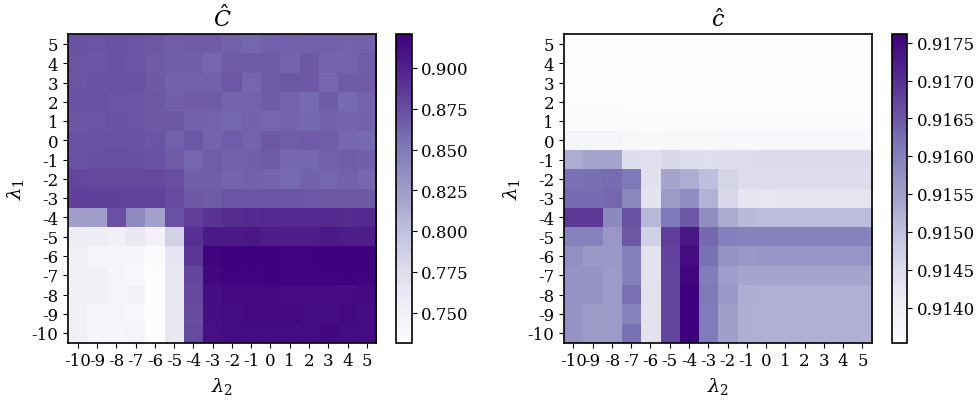

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Set global style parameters
plt.rcParams.update({
    'font.size': 14,                 # Global font size
    'axes.titlesize': 16,            # Title font size
    'axes.labelsize': 14,            # Axis label font size
    'xtick.labelsize': 12,           # X-tick label font size
    'ytick.labelsize': 12,           # Y-tick label font size
    'legend.fontsize': 12,           # Legend font size
    'figure.figsize': (8, 6),        # Figure size
    'axes.linewidth': 1.2,           # Line width for axes
    'grid.linewidth': 0.5,           # Line width for grid lines
    'grid.color': 'gray',            # Grid line color
    'legend.frameon': True,         # No frame for legend
    'axes.grid': False,               # Enable grid
    'grid.alpha': 0.5,
    'savefig.bbox' : 'tight',
    'savefig.pad_inches' : 0.05,
    'font.family' : 'serif',
    'mathtext.fontset' : 'dejavuserif'})

corr_C = np.load('./gridsearch16x16/gridsearch_C.npy')
corr_c = np.load('./gridsearch16x16/gridsearch_c.npy')
grid = np.logspace(-10, 0, num=16)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4), layout = 'constrained')
axs[0].set_title('$\\hat{C}$')
img1 = axs[0].imshow(corr_C, origin='lower', cmap='Purples')
axs[0].set_xlabel("$\\lambda_2$")
axs[0].set_ylabel("$\\lambda_1$")
axs[0].set_xticks(ticks=range(16), labels=range(-10,6))
axs[0].set_yticks(ticks=range(16), labels=range(-10,6))
#axs[0].colorbar();

axs[1].set_title('$\\hat{c}$')
img2 = axs[1].imshow(corr_c, origin='lower', cmap='Purples')
axs[1].set_xlabel("$\\lambda_2$")
axs[1].set_ylabel("$\\lambda_1$")
axs[1].set_xticks(ticks=range(16), labels=range(-10,6))
axs[1].set_yticks(ticks=range(16), labels=range(-10,6))
#axs[1].colorbar();
cbar = fig.colorbar(img1, ax=axs[0], orientation='vertical')
cbar = fig.colorbar(img2, ax=axs[1], orientation='vertical')
#plt.savefig('gridsearch.pdf')
#plt.savefig('gridsearch.png', dpi=200)

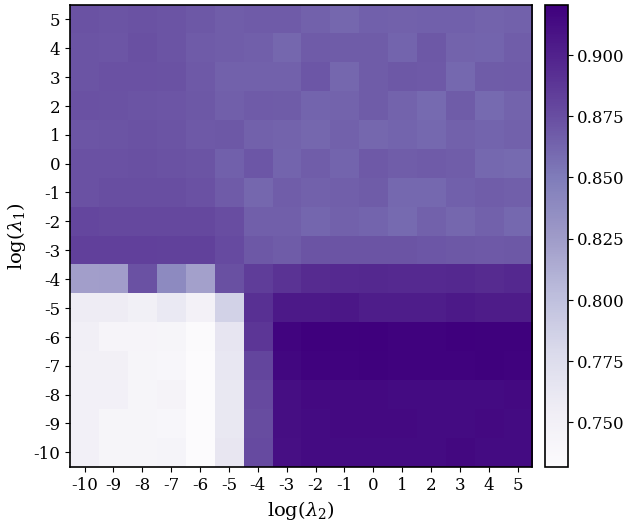

In [2]:
fig, ax = plt.subplots()
#ax.set_title('Mean Correlation for $\\hat{C}$')
img1 = ax.imshow(corr_C, origin='lower', cmap='Purples')
ax.set_xlabel("log($\\lambda_2$)")
ax.set_ylabel("log($\\lambda_1$)")
ax.set_xticks(ticks=range(16), labels=range(-10,6))
ax.set_yticks(ticks=range(16), labels=range(-10,6))
cbar = fig.colorbar(img1, ax=ax, orientation='vertical', pad=0.02,fraction=0.0468)
#cbar.ax.set_aspect(10)
plt.savefig('plots_appnote/pdf/gridsearch_C.pdf')
plt.savefig('plots_appnote/png/gridsearch_C.png', dpi=200)
#plt.savefig('plots_appnote/gridsearch_C.pgf')

From the plots we deduct that a good choice for $\lambda_1$ is $10^{-6}$, as it holds the maximum correlation values for the known cell types in $\hat{C}$ and is located in the big high performance region in for the hidden contribution $\hat{c}$. For $\lambda_2$ a value of $10^{-3}$ and above yields optimal performance for $\hat{C}$, with correlation values above 90 percent. Furthermore we observe that $\lambda_2$ has no big impact on the performance of the hidden contribution, as long $\lambda_1$ is chosen well (take a look at the scale of the colormap).

-----